## N-Grams Experiment

#### Hypotheses
1. Having more model answers will increase the scoring accuracy of ASAG using N-grams.
2. Using N-Grams with N=(1-3) will be the optimal range.
3. Using N-Grams will model responses which require word order better than set overlap methods. 

In [1]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import exp_libs.ngrams as ng
import libs.preprocessing as pp
import libs.stats as stats
import libs.utils as utils
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_en = pd.read_csv('../../../datasets/final/en/asag_v2_en_filter.csv', sep='~')
df_en.head(2)

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   
1  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   
1   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   
1  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   
1  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   
1  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   
1   To simulate portions of the desired final pro...        5   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1  
1  correct_complete            NaN    5.0             2             1

## Run 01: N=1, MA_SIZE=1

In [3]:
reload(ng)

pipeline_phases = { 'case_normalization' : pp.case_normalization,
                    'punctuation_removal' : pp.punctuation_removal,
                    'remove_stopwords' : pp.create_remove_stopwords(pp.EN_STOPS),
                    'stemming' : pp.create_stemmer(pp.EN_STEMMER)}

pipeline = pp.create_pipeline(pipeline_phases, pp.whitespace_tokenize)

/home/che/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:305: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


             precision    recall  f1-score   support

        0.0       0.05      1.00      0.09        14
        1.0       0.00      0.12      0.00         8
        2.0       0.09      0.18      0.12       234
        3.0       0.05      0.11      0.07       157
        4.0       0.25      0.10      0.14       676
        5.0       0.71      0.12      0.21       921

avg / total       0.43      0.13      0.17      2010

Pearson's R: 0.34700616582912447
Cohen's Kappa: 0.0023496988793176854
MAE: 1.9104477611940298
Accuracy: 12.84%
Precision: 42.68%
Recall: 12.84%
F1-Measure: 16.54%
Stored 'exp1_data' (dict)


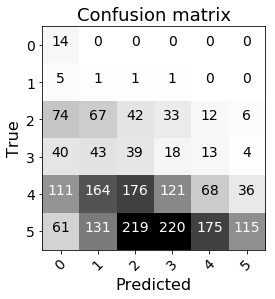

In [22]:
reload(ng)
results = ng.evaluate_model(df_en, pipeline, ma_size=1, ngram_size=(1,1))
stats.print_all_stats(results['y_true'], results['y_pred'])
exp1_data = stats.get_all_stats(results['y_true'], results['y_pred'])
%store exp1_data
stats.plot_confusion_matrix(stats.cm(results['y_true'], results['y_pred']), classes=np.arange(6))

## Run 02: N=2, MA_SIZE=1

/home/che/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:305: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


             precision    recall  f1-score   support

        0.0       0.05      1.00      0.09        14
        1.0       0.00      0.12      0.00         8
        2.0       0.09      0.18      0.12       234
        3.0       0.05      0.11      0.07       157
        4.0       0.28      0.10      0.15       676
        5.0       0.75      0.18      0.28       921

avg / total       0.45      0.15      0.20      2010

Pearson's R: 0.35531586150654004
Cohen's Kappa: 0.02102527325938197
MAE: 1.8472636815920398
Accuracy: 15.22%
Precision: 45.19%
Recall: 15.22%
F1-Measure: 20.08%
Stored 'exp2_data' (dict)


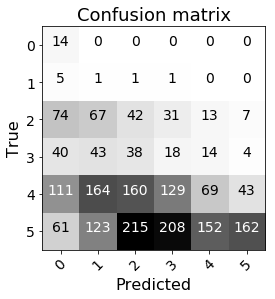

In [23]:
reload(ng)
results2 = ng.evaluate_model(df_en, pipeline, ma_size=1, ngram_size=(1,2))
stats.print_all_stats(results2['y_true'], results2['y_pred'])
exp2_data = stats.get_all_stats(results2['y_true'], results2['y_pred'])
%store exp2_data
stats.plot_confusion_matrix(stats.cm(results2['y_true'], results2['y_pred']), classes=np.arange(6))

## Run 03: N=3, MA_SIZE=1

/home/che/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:305: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


             precision    recall  f1-score   support

        0.0       0.05      1.00      0.09        14
        1.0       0.00      0.12      0.00         8
        2.0       0.09      0.18      0.12       234
        3.0       0.05      0.11      0.07       157
        4.0       0.28      0.10      0.15       676
        5.0       0.75      0.18      0.28       921

avg / total       0.45      0.15      0.20      2010

Pearson's R: 0.35519182324637194
Cohen's Kappa: 0.021454626537986687
MAE: 1.8467661691542288
Accuracy: 15.27%
Precision: 45.29%
Recall: 15.27%
F1-Measure: 20.15%
Stored 'exp3_data' (dict)


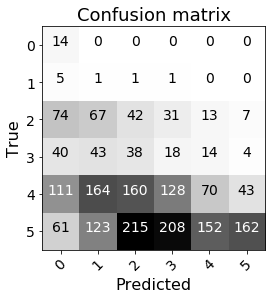

In [24]:
results3 = ng.evaluate_model(df_en, pipeline, ma_size=1, ngram_size=(1,3))
stats.print_all_stats(results3['y_true'], results3['y_pred'])
exp3_data = stats.get_all_stats(results3['y_true'], results3['y_pred'])
%store exp3_data
stats.plot_confusion_matrix(stats.cm(results3['y_true'], results3['y_pred']), classes=np.arange(6))

## Run 04: N=4, MA_SIZE=1

/home/che/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:305: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


             precision    recall  f1-score   support

        0.0       0.05      1.00      0.09        14
        1.0       0.00      0.12      0.00         8
        2.0       0.09      0.18      0.12       234
        3.0       0.05      0.11      0.07       157
        4.0       0.28      0.10      0.15       676
        5.0       0.75      0.18      0.28       921

avg / total       0.45      0.15      0.20      2010

Pearson's R: 0.35519182324637194
Cohen's Kappa: 0.021454626537986687
MAE: 1.8467661691542288
Accuracy: 15.27%
Precision: 45.29%
Recall: 15.27%
F1-Measure: 20.15%
Stored 'exp4_data' (dict)


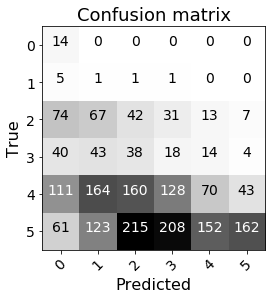

In [25]:
reload(ng)
results4 = ng.evaluate_model(df_en, pipeline, ma_size=1, ngram_size=(1,4))
stats.print_all_stats(results4['y_true'], results4['y_pred'])
exp4_data = stats.get_all_stats(results4['y_true'], results4['y_pred'])
%store exp4_data
stats.plot_confusion_matrix(stats.cm(results4['y_true'], results4['y_pred']), classes=np.arange(6))

## Does it answer the ordered questions better?

In [21]:
ordered_idxs = df_en['ID'] == 12.3
ordered_qt = results4['y_true'][ordered_idxs]
ordered_qp = results4['y_pred'][ordered_idxs]
stats.print_all_stats(ordered_qt, ordered_qp)
ng.inspect_results(df_en, results4['y_true'], results4['y_pred'], ordered_idxs, results4['ngrams'])

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        2.0       0.00      0.00      0.00         6
        3.0       0.00      0.00      0.00         2
        4.0       0.00      0.00      0.00         7
        5.0       0.48      1.00      0.65        13

avg / total       0.22      0.46      0.30        28

Pearson's R: 0.32045601821828257
Cohen's Kappa: 0.03002309468822173
MAE: -0.8571428571428571
Accuracy: 46.43%
Precision: 22.35%
Recall: 46.43%
F1-Measure: 30.18%
Prompt:  Order the following functions by their running time: n to the power of 2; log -LRB- log n -RRB- ; 2 to the power of -LRB- log n -RRB- ; n!; n to the power of 3. 
Score: 4.0, Score-Pred: 5.0
MA:  log -LRB- log n -RRB- ; 2 to the power of -LRB- log n -RRB- ; n to the power of 2; n to the power of 3; n! 
MA_ngrams: [{('log',): 1, ('-lrb-',): 1, ('n',): 1, ('-rrb-',): 1, ('2',): 1, ('power',): 1, ('n!',): 1, ('log', '-lrb-'): 1, ('-lrb-', 'log'): 1, ('n',

/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/che/anaconda3/lib/python3.6/site

## Run 05: N=3, MA_SIZE=2 

/home/che/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:305: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


             precision    recall  f1-score   support

        0.0       0.10      1.00      0.18        14
        1.0       0.00      0.12      0.01         8
        2.0       0.13      0.26      0.18       234
        3.0       0.06      0.17      0.09       157
        4.0       0.29      0.14      0.19       676
        5.0       0.75      0.25      0.37       921

avg / total       0.46      0.21      0.26      2010

Pearson's R: 0.4213502334708848
Cohen's Kappa: 0.05140917571532311
MAE: 1.4149253731343283
Accuracy: 21.04%
Precision: 46.31%
Recall: 21.04%
F1-Measure: 26.16%
Stored 'exp5_data' (dict)


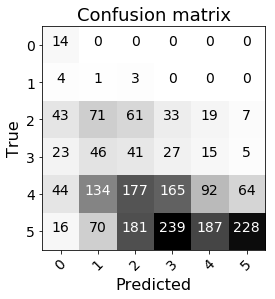

In [27]:
reload(ng)
results5 = ng.evaluate_model(df_en, pipeline, ma_size=2, ngram_size=(1,3))
stats.print_all_stats(results5['y_true'], results5['y_pred'])
exp5_data = stats.get_all_stats(results5['y_true'], results5['y_pred'])
%store exp5_data
stats.plot_confusion_matrix(stats.cm(results5['y_true'], results5['y_pred']), classes=np.arange(6))

## Run 06: N=3, MA_SIZE=3

/home/che/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:305: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


             precision    recall  f1-score   support

        0.0       0.13      1.00      0.22        14
        1.0       0.02      0.50      0.03         8
        2.0       0.14      0.27      0.19       234
        3.0       0.07      0.21      0.10       157
        4.0       0.31      0.15      0.21       676
        5.0       0.74      0.29      0.42       921

avg / total       0.47      0.24      0.29      2010

Pearson's R: 0.4489274883219006
Cohen's Kappa: 0.07073085882787922
MAE: 1.227860696517413
Accuracy: 24.23%
Precision: 46.70%
Recall: 24.23%
F1-Measure: 29.25%
Stored 'exp6_data' (dict)


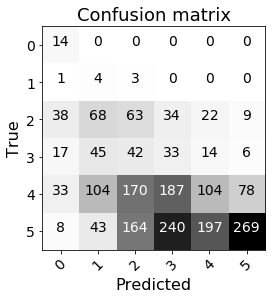

In [28]:
reload(ng)
results6 = ng.evaluate_model(df_en, pipeline, ma_size=3, ngram_size=(1,3))
stats.print_all_stats(results6['y_true'], results6['y_pred'])
exp6_data = stats.get_all_stats(results6['y_true'], results6['y_pred'])
%store exp6_data
stats.plot_confusion_matrix(stats.cm(results6['y_true'], results6['y_pred']), classes=np.arange(6))

             precision    recall  f1-score   support

          0       0.38      0.65      0.48       477
          1       0.86      0.67      0.75      1533

avg / total       0.74      0.66      0.69      2010

Pearson's R: 0.27169208770520215
Cohen's Kappa: 0.25184543475181753
MAE: 0.1691542288557214
Accuracy: 66.27%
Precision: 74.41%
Recall: 66.27%
F1-Measure: 68.60%


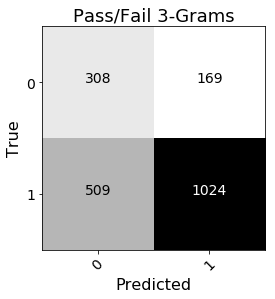

In [33]:
results6_pf = utils.convert_to_pass_fail(results6['y_pred'])
stats.print_all_stats(df_en['Class2_Score'], results6_pf)
exp6_data_pf = stats.get_all_stats(df_en['Class2_Score'], results6_pf)
stats.plot_confusion_matrix(stats.cm(df_en['Class2_Score'], results6_pf), classes=np.arange(2), title='Pass/Fail 3-Grams', savefile='../renderings/ngrams_pass_fail')

In [37]:
np.unique(df_en['MA'])

array([' A binary tree that has the property that for any node the left child is smaller than the parent which in turn is smaller than the right child. ',
       ' A collection of elements that can be allocated dynamically. ',
       ' A collection of nodes, which has a special node called root, and the rest of the nodes are partitioned into one or more disjoint sets, each set being a tree. ',
       ' A constructor is called whenever an object is created, whereas a function needs to be called explicitly.  Constructors do not have return type, but functions have to indicate a return type. ',
       ' A data structure that can store elements, which has the property that the last item added will be the first to be removed -LRB- or last-in-first-out -RRB- ',
       ' A data structure that can store elements, which has the property that the last item added will be the last to be removed -LRB- or first-in-first-out -RRB- . ',
       ' A data structure that stores elements following the firs

## Other Language Tests

ID  AID  QID                                             Prompt  \
0  1.1    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                                  MA  \
0  Um das Verhalten von Teilen des gewünschten So...   

                                                 MA2  \
0  um ein Beispiel und Feedback zur Funktionsweis...   

                                                 MA3  \
0  als Konzeptnachweis dienen und veranschauliche...   

                                          NA  \
0  um Fehler zu finden oder Daten zu sammeln   

                                                  SA  MyScore  \
0  In dem Prototyp-Programm werden Probleme mit h...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

/home/che/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:305: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


             precision    recall  f1-score   support

        0.0       0.05      1.00      0.10        14
        1.0       0.00      0.25      0.01         8
        2.0       0.11      0.23      0.14       234
        3.0       0.06      0.13      0.08       157
        4.0       0.32      0.10      0.16       676
        5.0       0.77      0.19      0.30       921

avg / total       0.47      0.17      0.22      2010

Pearson's R: 0.3642727539654552
Cohen's Kappa: 0.03783417580013404
MAE: 1.853731343283582
Accuracy: 16.62%
Precision: 47.46%
Recall: 16.62%
F1-Measure: 21.53%


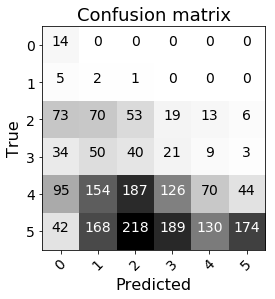

In [34]:
## GERMAN
df_de = pd.read_csv('../../../datasets/final/de/asag_v2_de_filter.csv', sep='~')
display(df_de.head(1))

pipeline_phases = { 'case_normalization' : pp.case_normalization,
                    'punctuation_removal' : pp.punctuation_removal,
                    'remove_stopwords' : pp.create_remove_stopwords(pp.DE_STOPS),
                    'stemming' : pp.create_stemmer(pp.DE_STEMMER)}

pipeline_de = pp.create_pipeline(pipeline_phases, pp.whitespace_tokenize)

results_de = ng.evaluate_model(df_de, pipeline_de, ma_size=3, ngram_size=(1,3))
stats.print_all_stats(results_de['y_true'], results_de['y_pred'])
exp_data_de = stats.get_all_stats(results_de['y_true'], results_de['y_pred'])
stats.plot_confusion_matrix(stats.cm(results_de['y_true'], results_de['y_pred']), classes=np.arange(6))

ID  AID  QID                                             Prompt  \
0  1.1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                                  MA  \
0  Para simular el comportamiento de porciones de...   

                                                 MA2  \
0  para proporcionar un ejemplo y retroalimentaci...   

                                                 MA3  \
0  para servir como prueba de concepto e ilustrar...   

                                         NA  \
0  para encontrar errores o recopilar datos   

                                                  SA  MyScore  \
0  Los problemas de alto riesgo se abordan en el ...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

/home/che/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:305: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


             precision    recall  f1-score   support

        0.0       0.12      1.00      0.22        14
        1.0       0.01      0.50      0.03         8
        2.0       0.13      0.27      0.18       234
        3.0       0.07      0.21      0.11       157
        4.0       0.28      0.14      0.19       676
        5.0       0.72      0.28      0.40       921

avg / total       0.45      0.23      0.28      2010

Pearson's R: 0.44174672870022813
Cohen's Kappa: 0.05833304526441996
MAE: 1.2606965174129354
Accuracy: 23.13%
Precision: 44.68%
Recall: 23.13%
F1-Measure: 27.76%


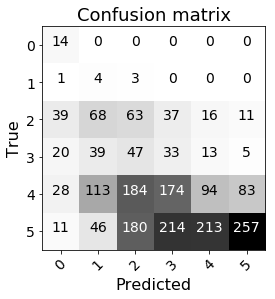

In [35]:
## Spanish
df_es = pd.read_csv('../../../datasets/final/es/asag_v2_es_filter.csv', sep='~')
display(df_es.head(1))

pipeline_phases = { 'case_normalization' : pp.case_normalization,
                    'punctuation_removal' : pp.punctuation_removal,
                    'remove_stopwords' : pp.create_remove_stopwords(pp.ES_STOPS),
                    'stemming' : pp.create_stemmer(pp.ES_STEMMER)}

pipeline_es = pp.create_pipeline(pipeline_phases, pp.whitespace_tokenize)

results_es = ng.evaluate_model(df_es, pipeline_es, ma_size=3, ngram_size=(1,3))
stats.print_all_stats(results_es['y_true'], results_es['y_pred'])
exp_data_de = stats.get_all_stats(results_es['y_true'], results_es['y_pred'])
stats.plot_confusion_matrix(stats.cm(results_es['y_true'], results_es['y_pred']), classes=np.arange(6))